<h1 style="text-align:center;">Microsoft Stock Forcasting with LSTMs</h1>


### Import libraries

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader as web
from copy import deepcopy
import math
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [114]:
df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060163,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400
...,...,...,...,...,...,...,...
9569,2024-03-04,413.440002,417.350006,412.320007,414.920013,414.920013,17596000
9570,2024-03-05,413.959991,414.250000,400.640015,402.649994,402.649994,26919200
9571,2024-03-06,402.970001,405.160004,398.390015,402.089996,402.089996,22344100
9572,2024-03-07,406.119995,409.779999,402.239990,409.140015,409.140015,18718500


- Open : Price from the first transaction of a trading day <br>
- High : Maximum price in a trading day <br>
- Low : Minimum price in a trading day<br>
- Close : Price from the last transaction of a trading day <br>
- Adj Close : Closing price adjusted to reflect the value after accounting for any corporate actions <br>
- Volume : Number of units traded in a day <br>

### Displaying information about the DataFrame


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9574 entries, 0 to 9573
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9574 non-null   object 
 1   Open       9574 non-null   float64
 2   High       9574 non-null   float64
 3   Low        9574 non-null   float64
 4   Close      9574 non-null   float64
 5   Adj Close  9574 non-null   float64
 6   Volume     9574 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 523.7+ KB


In [116]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,9574.0,5.462614e+01,8.243047e+01,8.854200e-02,5.617188e+00,2.724000e+01,4.590625e+01,4.205600e+02
High,9574.0,5.520082e+01,8.323561e+01,9.201400e-02,5.687500e+00,2.750000e+01,4.646969e+01,4.208200e+02
Low,9574.0,5.404126e+01,8.159438e+01,8.854200e-02,5.500000e+00,2.700000e+01,4.535594e+01,4.150900e+02
Close,9574.0,5.464229e+01,8.245967e+01,9.027800e-02,5.609375e+00,2.725000e+01,4.591750e+01,4.205500e+02
Adj Close,9574.0,4.907358e+01,8.245332e+01,5.586600e-02,3.471191e+00,1.913299e+01,3.671162e+01,4.197737e+02
Volume,9574.0,5.715955e+07,3.814098e+07,2.304000e+06,3.266598e+07,5.026420e+07,7.111035e+07,1.031789e+09


In [118]:
# Number of rows and columns in the DataFrame
print(f"There are {df.shape[0]} rows in dataframe. \n")
print(f"And {df.shape[1]} columns. \n")

# Displaying column names
print(f"Columns: {df.columns} \n")

# Percentage of null and missing values
print(f"Percentage of Null values : \n {df.isnull().sum() / df.shape[0]} \n")
print(f"Percentage of NA values : \n {df.isna().sum() / df.shape[0]}")

There are 9574 rows in dataframe. 

And 7 columns. 

Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

Percentage of Null values : 
 Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64 

Percentage of NA values : 
 Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64


### Data visualisation

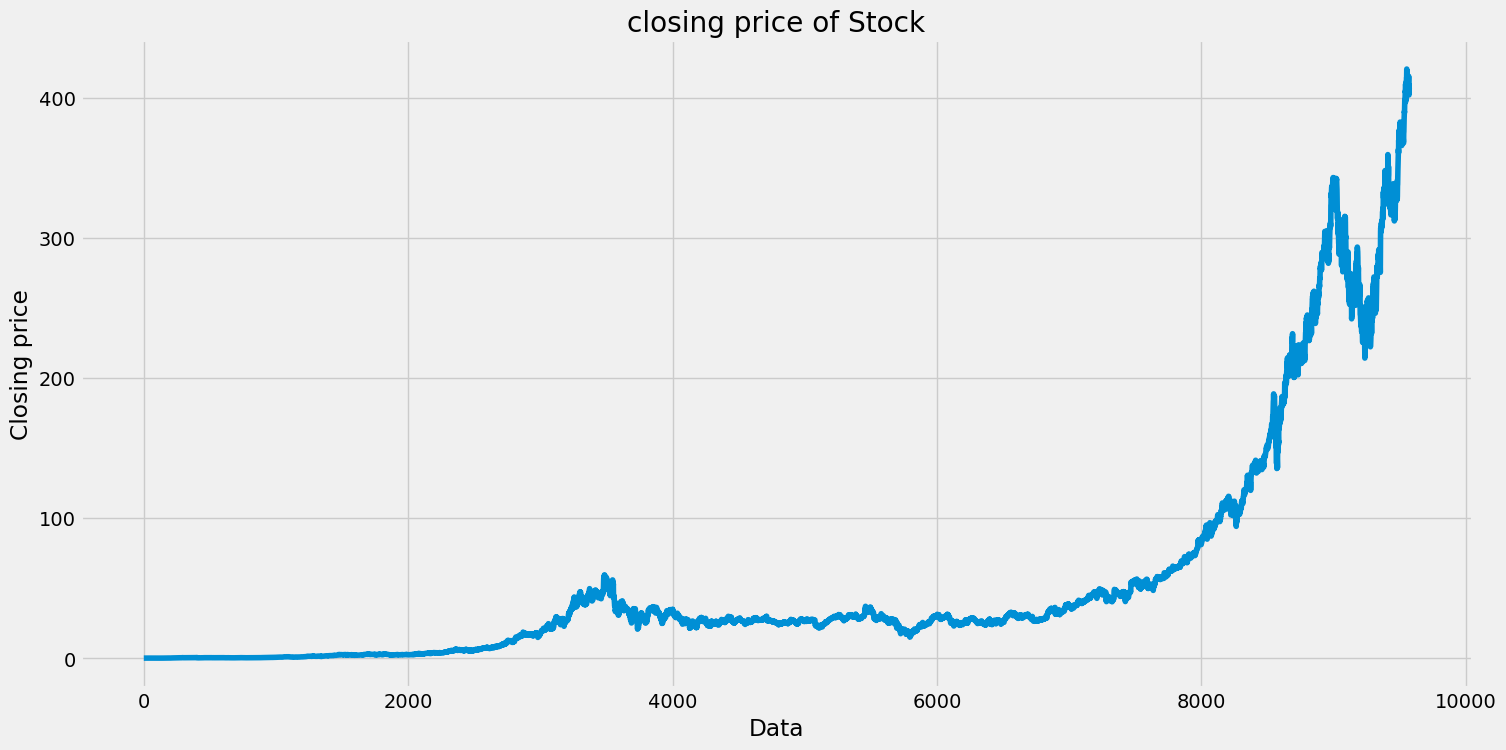

In [119]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price of Stock')
plt.plot(df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

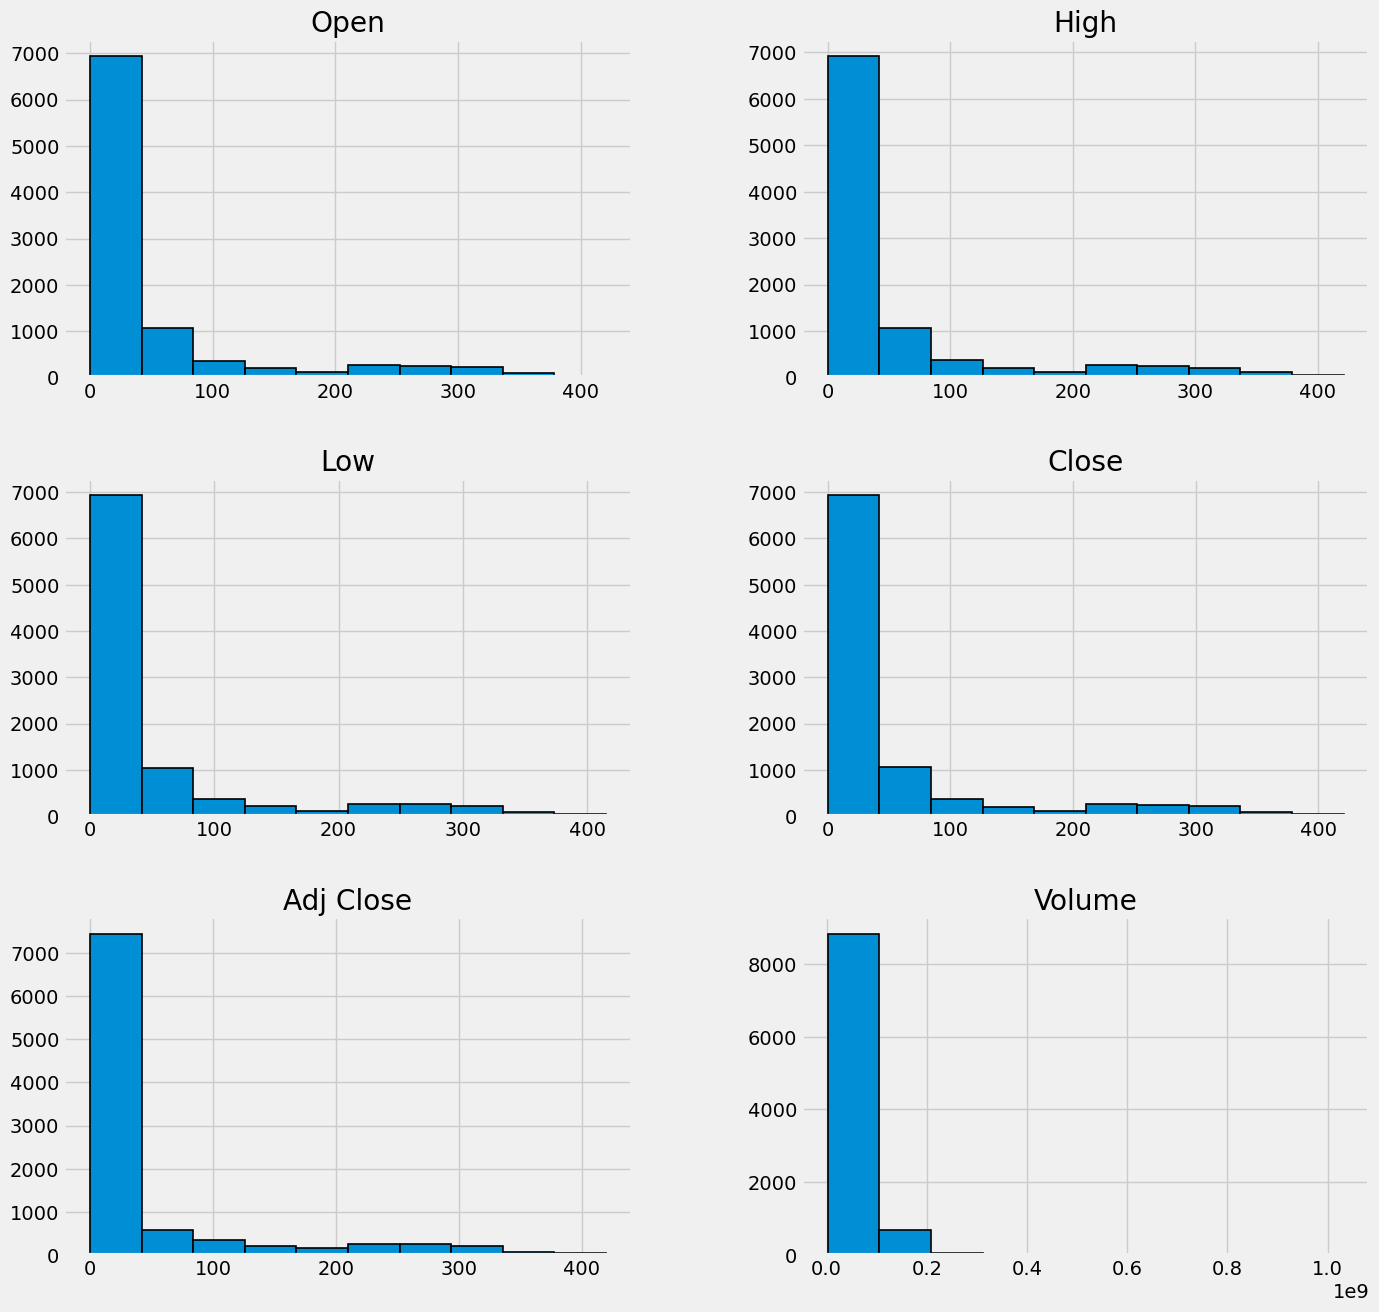

In [120]:
# Histogram of the data
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

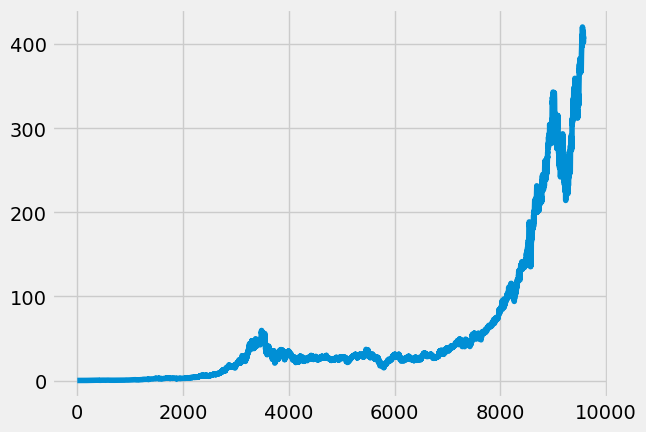

In [121]:
plt.plot(df.index, df['Close'])

### Data preprocessing

In [122]:
# Selecting 'Date' and 'Close' columns
df = df[["Date","Close"]]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9569,2024-03-04,414.920013
9570,2024-03-05,402.649994
9571,2024-03-06,402.089996
9572,2024-03-07,409.140015


In [123]:
# Converting 'Date' data type from Object to Date
def str_to_datetime(s) :
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day) 

In [124]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9569   2024-03-04
9570   2024-03-05
9571   2024-03-06
9572   2024-03-07
9573   2024-03-08
Name: Date, Length: 9574, dtype: datetime64[ns]

In [125]:
df.index = df.pop("Date")  #replacing the existing index with the values of the 'Date' column. 
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-03-04,414.920013
2024-03-05,402.649994
2024-03-06,402.089996


In [126]:
# Converting the problem into a supervised learning problem for LSTM model
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    """Fonction to transform the Dataframe into windowed data"""
    # Convert strings to datetime objects
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date
    
    dates = []
    X, Y = [], []

    last_time = False
    while True:
        # Extract a window of size n+1 from the dataframe
        df_subset = dataframe.loc[:target_date].tail(n+1)
        
        # Check if the window size is too large
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        # Extract input (X) and target (Y) values from the window
        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        # Append date, input, and target values
        dates.append(target_date)
        X.append(x)
        Y.append(y)

        # Get the next week's date
        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
        
        # Check if it's the last iteration
        if last_time:
            break
        
        target_date = next_date

        # Check if the target date is the last date
        if target_date == last_date:
            last_time = True
        
    # Create a DataFrame for windowed data
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
    
    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
    
    ret_df['Target'] = Y

    return ret_df

In [127]:
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2024-03-08', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
739,2024-03-04,407.720001,413.640015,415.500000,414.920013
740,2024-03-05,413.640015,415.500000,414.920013,402.649994
741,2024-03-06,415.500000,414.920013,402.649994,402.089996
742,2024-03-07,414.920013,402.649994,402.089996,409.140015


In [128]:
# Converting data for input into LSTM model
def windowed_df_to_date_X_y(windowed_dataframe):
    """Function to convert data into inputs and targets for LSTM model"""
    # Convert the DataFrame to a NumPy array
    df_as_np = windowed_dataframe.to_numpy()

    # Extract dates from the first column
    dates = df_as_np[:, 0]

    # Extract input features (X) from the second to second-to-last columns
    middle_matrix = df_as_np[:, 1:-1]
    
    # Reshape the input features into a 3D array for LSTM input
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    # Extract targets (Y) from the last column
    Y = df_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

In [129]:
# Calling windowed_df_to_date_X_y function
dates, X, y = windowed_df_to_date_X_y(windowed_df)

print(dates.shape)
print(X.shape)
print(y.shape)

(744,)
(744, 3, 1)
(744,)


In [130]:
# Splitting data into training, validation, and test sets

# Calculate the index for 80% of the data
q_80 = int(len(dates) * .8)

# Calculate the index for 90% of the data
q_90 = int(len(dates) * .9)

# Split the dates, input features (X), and targets (y) into training, validation, and test sets
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]  # Training set
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]  # Validation set
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]  # Test set

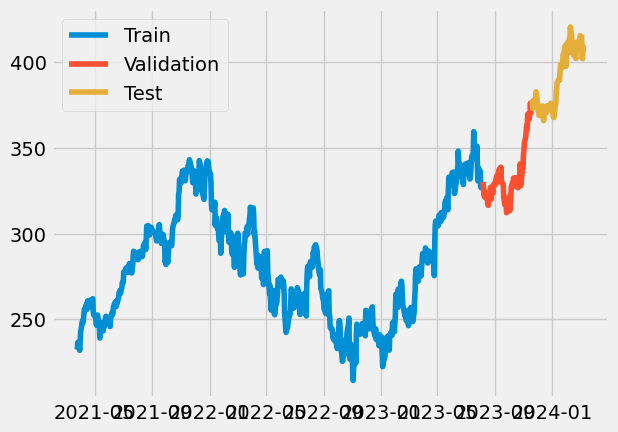

In [131]:
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

### Defining the LSTM model


In [132]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

In [133]:
# Training the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 79860.1562 - mean_absolute_error: 280.7057 - val_loss: 115328.6641 - val_mean_absolute_error: 331.2903
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80699.9141 - mean_absolute_error: 282.1738 - val_loss: 113552.8516 - val_mean_absolute_error: 328.6629
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77053.9219 - mean_absolute_error: 275.6042 - val_loss: 110142.8359 - val_mean_absolute_error: 323.5443
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 72781.2578 - mean_absolute_error: 267.7107 - val_loss: 102729.9609 - val_mean_absolute_error: 312.1660
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 66320.8906 - mean_absolute_error: 255.3749 - val_loss: 91663.1250 - val_mean_absolute_error: 294.3624
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 57340.3086 - mean_absolute_error: 237.1387 - val_loss: 75020.8672 - val_mean_absolute_error: 265.4442
Epoch 7/100
19/19 ━━━━━━━━━━━

In [134]:
# Predictions on the training set
train_predictions = model.predict(X_train).flatten()

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


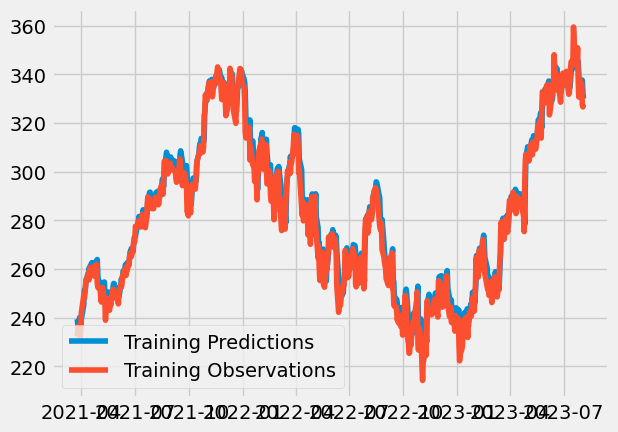

In [135]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [136]:
# Predictions on the validation set
val_predictions = model.predict(X_val).flatten()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


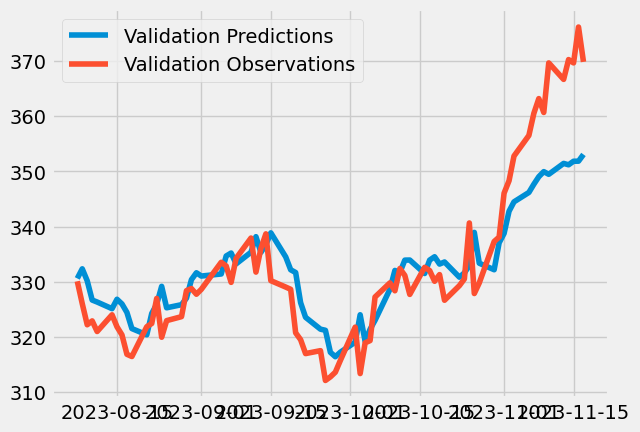

In [137]:
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

In [138]:
# Predictions on the test set
test_predictions = model.predict(X_test).flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


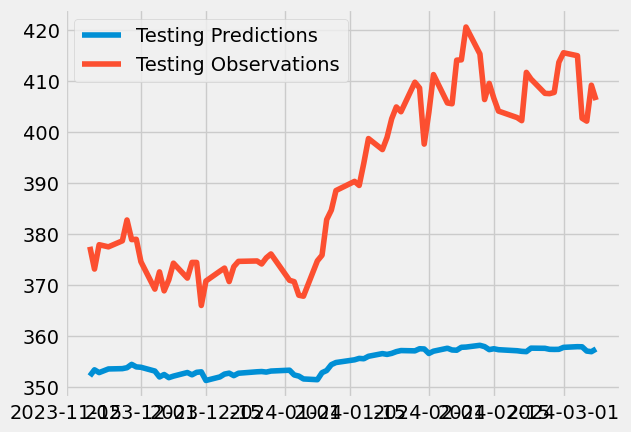

In [139]:
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

### Model Predictions vs. Actual Values Across Training, Validation, and Testing Sets

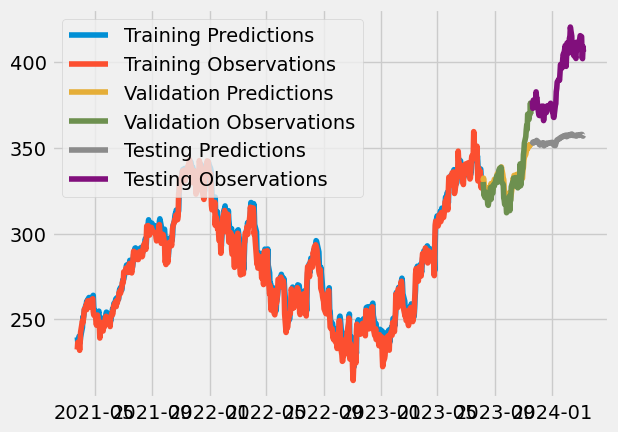

In [140]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

### Recursive Predictions Using Trained LSTM Model
The recursive approach allows us to utilize the model's predictions as inputs for generating subsequent predictions. By recursively updating the input window with the latest predicted value and feeding it back into the model, we can capture potential feedback loops or dependencies in the data and refine our predictions iteratively.

In [141]:
# Initialize an empty list to store the predicted values
recursive_predictions = []

# Concatenate dates_val and dates_test to create recursive_dates, representing dates for which predictions will be made
recursive_dates = np.concatenate([dates_val, dates_test])

# Iterate over each date in recursive_dates
for target_date in recursive_dates:
    # Take a deep copy of the last window of data from the training set to avoid modifying the original data
    last_window = deepcopy(X_train[-1])
    
    # Use the trained LSTM model to predict the next value based on this window of data
    next_prediction = model.predict(np.array([last_window])).flatten()
    
    # Append the predicted value to recursive_predictions
    recursive_predictions.append(next_prediction)
    
    # Update the last element of the window with the predicted value for the next iteration
    last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

### Model Predictions and Observations Across Training, Validation, Testing, and Recursive Predictions

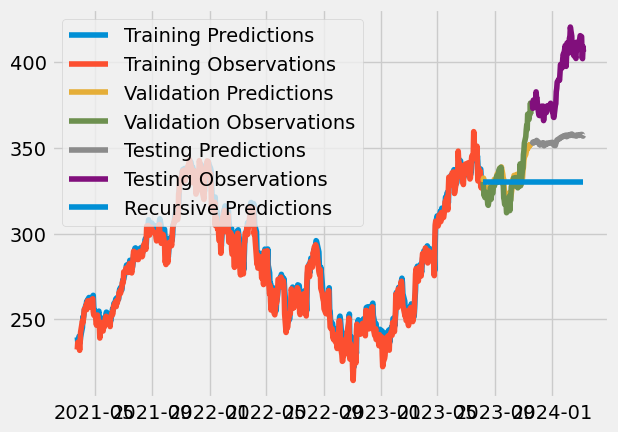

In [142]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])